## Гипотезы

1. площадь влияет на цену (H0: признаки независимы)
2. разница матожиданий стоимостей квартир в ЗАО и ВАО,ЮЗАО и СЗАО равна нулю (Н0: $\mu_1$ = $\mu_2$, используем ttest)
3. первичное жилье дороже вторичного (H0: $\mu_1$ = $\mu_2$, H1: $\mu_1$ > $\mu_2$)
4. квартиры в малоэтажных домах дороже (до 15 этажа) 
5. студии дороже, чем однокомнатные и двухкомнатные квартиры (отдельно сравним МО однокомнатных квартир и МО двухкомнатных квартир с МО студии)
6. расстояние до центра города влияет на цену (Н0: признаки независимы)

**1.** **Проверим наличие связи между площадью квартиры и ее ценой, используя коэффициент корреляции Пирсона.**

In [42]:
from scipy.stats import pearsonr
pearsonr(our_df2['price'], our_df2['area'])

(0.7395585334201134, 0.0)

В ходе проверки гипотезы о независимости мы выяснили, что нулевая гипотеза отвергается. То есть, существующая связь между переменными является статистически значимой. Более того, значение коэффициента корреляции довольно близко к единице, что указывает на положительную линейную зависимость.

**2. Разница матожиданий стоимостей квартир в ЗАО и ВАО, ЮЗАО и СЗАО равна нулю** 

Н0: $\mu_1$ = $\mu_2$ (используем ttest, двусторонняя альтернативная гипотеза)

После промежуточного дедлайна мы поняли, что округа для этого теста выбрали по диаграмме, которая отражала максимальные значения в каждом из округов. Для большей корректности мы построили столбчатые диаграммы по средним и медианным значениям и по ним выбрали, какие округа будем проверять на равенство мат ожиданий.

In [43]:
a = dict()
for i in our_df2['district'].unique():
    a[f'{i}'] = our_df2[our_df2['district'] == i]['price'].mean()   
a

{'ЗАО': 29716934.49665121,
 'ВАО': 12338216.950036738,
 'ЮВАО': 11195743.443055555,
 'ЮЗАО': 19679699.229714286,
 'СЗАО': 26130738.719491526,
 'ЦАО': 72588003.9955074,
 'СВАО': 14527841.275672173,
 'САО': 21842584.230312034,
 'ЮАО': 11692965.50314136}

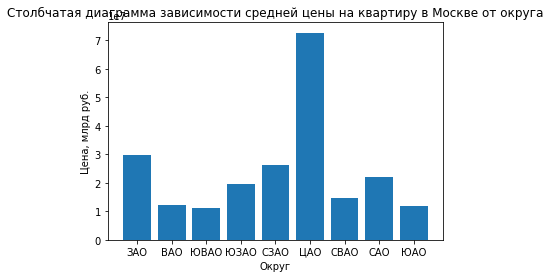

In [44]:
plt.bar(a.keys(), a.values())
plt.xlabel("Округ")
plt.ylabel("Цена, млрд руб.")
plt.title('Столбчатая диаграмма зависимости средней цены на квартиру в Москве от округа')
plt.show()

По этой диаграмме видно, что следует проверить гипотезу о равенстве мат ожиданий цен в ЮЗАО и САО, а также сранвить между собой ВАО, ЮАО и ЮВАО.

In [45]:
yzao = our_df2[our_df1['district']=='ЮЗАО']['price'].to_list()
sao = our_df2[our_df1['district']=='САО']['price'].to_list()
vao = our_df2[our_df1['district']=='ВАО']['price'].to_list()
yao = our_df2[our_df1['district']=='ЮАО']['price'].to_list()
yvao = our_df2[our_df1['district']=='ЮВАО']['price'].to_list()

In [46]:
from scipy.stats import ttest_ind
ttest_ind(yzao, sao)

Ttest_indResult(statistic=-3.143743914838815, pvalue=0.0016779571036478775)

In [47]:
ttest_ind(vao, yao)

Ttest_indResult(statistic=2.365038198445968, pvalue=0.018069214520209438)

In [48]:
ttest_ind(yvao, vao)

Ttest_indResult(statistic=-4.435872979972916, pvalue=9.371697178874657e-06)

In [49]:
ttest_ind(yao, yvao)

Ttest_indResult(statistic=2.7845104204701454, pvalue=0.0053856485614466555)

Видно, что гипотеза о равенстве мат ожиданий цен на квартиру в ВАО и ЮАО не отвергается на уровне значимости 1%. В других иследованных парах отвергается на любых разумных уровнях значимости.

In [50]:
a1 = dict()
for i in our_df2['district'].unique():
    a1[f'{i}'] = our_df2[our_df2['district'] == i]['price'].median()   
a1

{'ЗАО': 18600000.0,
 'ВАО': 10020000.0,
 'ЮВАО': 9990000.0,
 'ЮЗАО': 13700000.0,
 'СЗАО': 19000000.0,
 'ЦАО': 31200000.0,
 'СВАО': 11864281.0,
 'САО': 16568150.0,
 'ЮАО': 10500000.0}

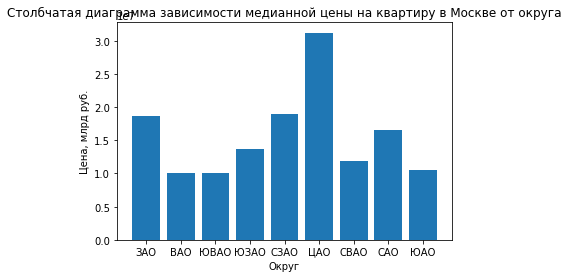

In [51]:
plt.bar(a1.keys(), a1.values())
plt.xlabel("Округ")
plt.ylabel("Цена, млрд руб.")
plt.title('Столбчатая диаграмма зависимости медианной цены на квартиру в Москве от округа')
plt.show()

Анализируя столбчатую диаграмму для медианных цен, прослеживаются похожие тенденции (как со средними значениями). Кроме того, можно проверить равенство мат ожиданий цен в СЗАО и ЗАО.

In [52]:
szao = our_df2[our_df2['district'] == 'СЗАО']['price'].to_list()
zao = our_df2[our_df2['district'] == 'ЗАО']['price'].to_list()

In [53]:
ttest_ind(szao, zao)

Ttest_indResult(statistic=-3.540591655764069, pvalue=0.00040282371107312493)

Гипотеза о равенстве мат ожиданий цен в СЗАО и ЗАО отвергается.

**3. Первичное жилье дороже вторичного**

H0: $\mu_1$ = $\mu_2$

H1: $\mu_1$ > $\mu_2$

Проверим гипотезу о равенстве мат ожиданий цен на первичное и вторичное жилье, предварительно построив столбчатую диаграмму, опираясь на средние значения цен квартир.

In [54]:
a2 = dict()
for i in our_df2['object_type'].unique():
    a2[f'{i}'] = our_df2[our_df2['object_type'] == i]['price'].mean()   
a2

{'2': 23122952.323423784, '0': 28741797.26892516}

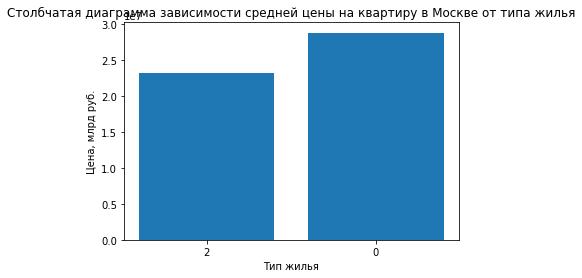

In [55]:
plt.bar(a2.keys(), a2.values())
plt.xlabel("Тип жилья")
plt.ylabel("Цена, млрд руб.")
plt.title('Столбчатая диаграмма зависимости средней цены на квартиру в Москве от типа жилья')
plt.show()

In [56]:
ttest_ind(our_df2[our_df2['object_type'] == 0]['price'], our_df2[our_df2['object_type'] == 2]['price'], alternative='greater')

Ttest_indResult(statistic=6.745128694568104, pvalue=7.82101592892805e-12)

Нулевая гипотеза отвергается при заданной альтернативной на любом уровне значимости. 

**4. Квартиры в малоэтажных домах дороже (до 15 этажа)**

Проверим гипотезу о том, что квартиры в малоэтажных домах дороже (до 15 этажа) (H0: $\mu_1$ = $\mu_2$, H1: $\mu_1$ > $\mu_2$)
Данная гипотеза возникла в связи с тем, что малоэтажные дома находятся ближе к центру Москвы, следовательно, они предположительно могут быть дороже.

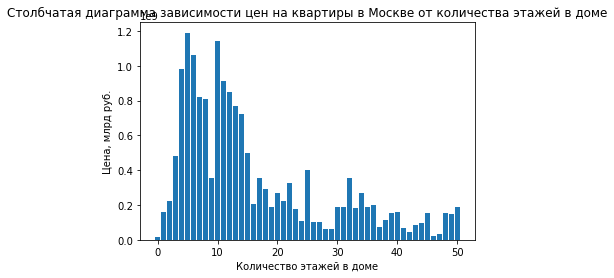

In [57]:
plt.bar(our_df2['n_floors'], our_df2['price'])
plt.xlabel("Количество этажей в доме")
plt.ylabel("Цена, млрд руб.")
plt.title('Столбчатая диаграмма зависимости цен на квартиры в Москве от количества этажей в доме')
plt.show()

In [58]:
ttest_ind(our_df2[our_df2['n_floors'] <= 15]['price'], our_df2[our_df2['n_floors'] > 15]['price'], alternative='greater')

Ttest_indResult(statistic=11.653895164315832, pvalue=1.3349555919824198e-31)

In [59]:
ttest_ind(our_df2[our_df2['n_floors'] <= 10]['price'], our_df2[our_df2['n_floors'] > 10]['price'], alternative='greater') 
# посмотрим на статистику и p-value при 10 этажах в доме

Ttest_indResult(statistic=6.484842943518764, pvalue=4.528952244831289e-11)

Судя по маленькому значению p-value, нулевая гипотеза отвергается.
Проверим корреляцию между ценой и кол-вом этажей в доме.

In [60]:
pearsonr(our_df2['n_floors'], our_df2['price'])

(-0.03891277226444309, 2.1684979135692125e-09)

Видим, что p-value мало, поэтому гипотеза о независимости отвергается на любом разумном уровне значимости. Существует небольшая (практически нулевая) отрицательная линейная зависимость.

Вывод: нулевая гипотеза о равенстве МО отвергается на любом разумном уровне значимости, поэтому есть основания предполагать, что квартиры в малоэтажных домах стоят дороже. А также с помощью корреляции Пирсона показали, что существует небольшая отрицательная линейная зависимость между кол-вом этажей в доме и ценой квартиры.

**5. Студии дороже, чем однокомнатные и двухкомнатные квартиры**

Проверка гипотезы про цены студий:
Здесь также для большей корректности построим столбчатые диаграммы по средним значениям и выберем, с каким количеством комнат квартиры будем проверять на равенство мат ожиданий.

In [63]:
b = dict()
for i in our_df2['rooms'].unique():
    b[f'{i}'] = our_df2[our_df2['rooms'] == i]['price'].mean()   
b

{'2': 18219054.724423055,
 '-1': 7413367.16,
 '4': 67619821.60135135,
 '3': 30524151.369561777,
 '1': 11298307.69630842,
 '5': 151130371.79963234,
 '6': 253581058.56470588,
 '8': 99356184.7,
 '7': 172453633.33333334,
 '9': 55574820.0}

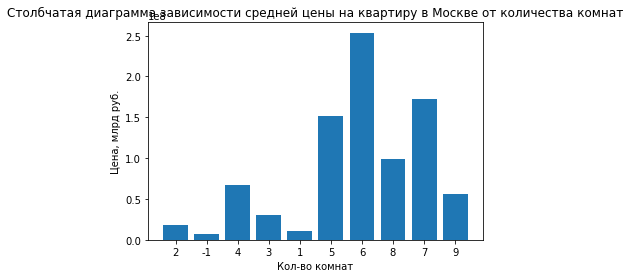

In [64]:
plt.bar(b.keys(),b.values())
plt.xlabel("Кол-во комнат")
plt.ylabel("Цена, млрд руб.")
plt.title('Столбчатая диаграмма зависимости средней цены на квартиру в Москве от количества комнат')
plt.show()


По данной диаграмме заметно, что средние цены на студии гораздо меньше, чем на квартиры с нескольким количеством комнат. Следовательно, наши предположения о том, что цены на студию выше цен на квартиры оказались неверными. Проверим наличие связи между ценой квартиры и числом комнат, используя коэффициент корреляции Пирсона, а также сравним матожидания цен на квартиры с 5 и 7 комнатами; с 1 комнатой и студии.

In [65]:
from scipy.stats import pearsonr
pearsonr(our_df2['price'], our_df2['rooms'])

(0.43545528635584296, 0.0)

В ходе проверки данной гипотезы о независимости мы выяснили, что нулевая гипотеза отвергается. То есть, существующая связь между переменными является статистически значимой. Присутствует слабая положительная линейная зависимость.

In [66]:
ttest_ind(our_df2[our_df2['rooms'] == 5]['price'], our_df2[our_df2['rooms'] == 7]['price'])

Ttest_indResult(statistic=-0.45729052369423645, pvalue=0.6476415086975609)

In [67]:
ttest_ind(our_df2[our_df2['rooms'] == 1]['price'], our_df2[our_df2['rooms'] == -1]['price'])

Ttest_indResult(statistic=13.318037557558762, pvalue=5.696471312667692e-40)

Видим, что нет оснований отвергать гипотезу о равенстве цен на 5-комнатные и 7-комнатные квартиры.

**6. Расстояние до центра города влияет на цену (Н0: признаки независимы)**

Проверим также гипотезу о том, что удаленность квартиры от центра города влияет на ее цену.

In [68]:
from scipy.stats import pearsonr
pearsonr(our_df2['price'], our_df2['gap'])

(-0.2945791496363267, 0.0)

Нулевое p-value говорит о том, что гипотеза о независимости отвергается и коэффициент корреляции значим. Кроме того, значение коэффициента отрицательно, то есть можно сказать о наличии слабой отрицательной линейной связи между признаками. Отметим, что полученный вывод согласуется с логикой - чем меньше расстояние до центра, тем дороже квартира.

#### *Выводы, полученные с помощью проверки гипотез:*

- выявлена сильная положительная зависимость цены на квартиру от ее площади
- есть основания полагать, что цены на квартиры в ВАО и ЮАО имеют одинаковое математическое ожидание
- гипотеза о равенстве цен на первичное и вторичное жилье отверглась
- выявлена средняя положительная зависимость между ценой квартиры и количеством комнат в ней
- есть основания полагать, что цены на на 5-комнатные и 7-комнатные квартиры имеют одинковое математическое ожидание
- гипотеза о равенстве цен на квартиры в малоэтажных и высокоэтажных домах отверглась
- выявлена слабая отрицательная зависимость между ценой квартиры и ее удаленностью от центра Москвы